In [61]:
import os
cwd = os.getcwd()
path="/Users/heatherkopsco/Desktop/PhD/Big_Data_Analysis"
os.chdir(path)
cwd

'/Users/heatherkopsco/Desktop/PhD/Big_Data_Analysis'

In [62]:
import Bio
from Bio.Seq import Seq

In [75]:
#Create a seq object
hk_seq = Seq('AAGTACACTAG', alphabet = ('A', 'C', 'G', 'T'))
hk_seq

Seq('AAGTACACTAG', ('A', 'C', 'G', 'T'))

In [77]:
counter={}
k=2
for line_number,line in enumerate(hk_seq):
    if line_number%4==1:
        line=line.rstrip()
        for i,base in enumerate(line[:-k+1]):
            kmer = line[i:i+k]
            if kmer in counter:
                counter[kmer]+=1
            else:
                counter[kmer]=1
            
print(counter)

{}


In [80]:
#Kmer counting function 

def count_kmers(k,hk_seq,counter={}):
    for line_number,line in enumerate(hk_seq):
        if line_number%4==1:
            line=line.rstrip()
            for i,base in enumerate(line[:-k+1]):
                kmer = line[i:i+k]
                if kmer in counter:
                    counter[kmer]+=1
                else:
                    counter[kmer]=1
    return(counter)

In [81]:
#Calculate linguistic complexity

def l_complex ((len(counter))/(4**k))

SyntaxError: invalid syntax (<ipython-input-81-5e9a88ee5836>, line 3)

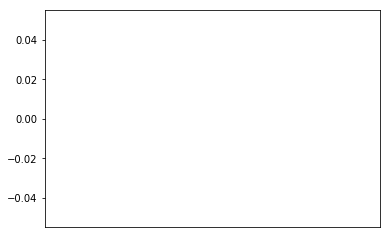

In [82]:
#Plotting frequency of kmers

import matplotlib.pyplot as plt
%matplotlib inline

names = list(counter.keys())
values = list(counter.values())

plt.bar(range(len(counter)),values,tick_label=names);

In [83]:
#Pandas dataframe

import pandas
counter_df = pandas.DataFrame(counter, index=['kmer'])
print(counter_df)
counter_df.plot(kind='bar');

Empty DataFrame
Columns: []
Index: [kmer]


TypeError: Empty 'DataFrame': no numeric data to plot

In [84]:
#Download seq file
!curl -O http://github.com/hkopsco/pythonassignment/nd2.fasta

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0


In [85]:
#Open and read the fasta file
filename = 'nd2.fasta'
f = open(filename,'r')
fasta = f.readlines()

In [86]:
#Find fasta sequence files
import glob
filelist = glob.glob('*fasta')
print(filelist)

['nd2.fasta']


In [87]:
#Feed seq file into kmer counting function
counter={}
k=3
for filename in glob.glob('*fasta'):
    f = open(filename,'r')
    fasta = f.readlines()
    counter = count_kmers(k,fasta,counter)
print(counter)
print('Number of kmers: ',len(counter))
print('Number of possible kmers: ',4**k)

{}
Number of kmers:  0
Number of possible kmers:  64


In [88]:
#Unit testing with py.test

from count_kmers import count_kmers
import pytest

#test that k = 3 is 64 
def test_count_kmers(fasta):
    counter = count_kmers(2,fasta,{})
    assert len(counter) == 64

#test that k = 0 is 0 
def test_kmers0(fasta):
    counter = count_kmers(0,fasta,{})
    assert len(counter) == 0

#test that k = 1000 is 0
def test_kmers1000(fasta):
    counter = count_kmers(1000,fasta,{})
    assert len(counter) == 0

#test that k = -4 is 0
def test_kmers_neg(fasta):
    counter = count_kmers(-4,fasta,{})
    assert len(counter) == 0


ModuleNotFoundError: No module named 'count_kmers'